<a href="https://colab.research.google.com/github/vivianusdjpy/UFC-GROUP-PROJECT/blob/master/UFC_GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEFINING THE QUESTION

# DEFINING THE QUESTION


a) **Specifying data analytic question**

Is it true to say that The average blue car activity per station in paris is greater in the morning hours than in the afternoon hours?

b)  **Defining the Metric for Success**

Hypothesis testing will be carried out. The significance level will be compared to the P-Value,and from this we will be able to make our conclusion.
P-Value < Significance level, null hypothesis willbe rejected

c)  **Understanding the context**

Usage of electric cars has seen growth with the advancement of technology. Unlike the fuel cars,electric cars are more environmentally friendly and thus sustainable. An increase in electric car usage will mean a well kept environment.

Autolib is an electric car sharing company. the company has 3 main types of electric cars: blue cars, utilib counter and the utilib 4 counter. these cars operate in the city of france.

There has been several discussions on when there is highest activity of the blue car, whether it is in the morning hours or the afternoon hours. The company has tasked me to do an investigation toclearly know at what times usage is greater. This will mostly help in planning the marketing strategies and segmentation

d)  **Recording the Experimental Design**

The main objective of the ressearch is to determine whether the average blue car activity per station in paris is greater in the morning hours than in the afternoon hours. 
I will use a data set from the Autolib company to do my analysis. Data will be cleaned and quality assurance done.
i will then proceed to analysis(Univariate, Bivariate and Multivariate) so as to get a deeper understanding of the data.
A sample from the data will be used to carry out hypothesis testing and thus answer the business question, make conclusions and recommendations.

d) **Data relevance**

The autolib data set is from the previous business year 2018. This was in the latest annual report prepare by the Autolib company. It will be used to answer the business as it is well detailed and contains all important information including: car type, city, postal adress time, electric car stations details e.t.c


# READING THE DATA

In [0]:
#loading libraries
import pandas as pd
    

In [0]:
#loading the data set
A='/content/data.csv'
df=pd.read_csv(A)
df.head()

,R_fighter,B_fighter,Referee,location,Winner,weight_class,no_of_rounds,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_time_fought(seconds),B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_total_rounds_fought,R_total_time_fought(seconds),R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,"Chicago, Illinois, USA",Red,Bantamweight,5,4,1,9,419.400000,4,Orthodox,167.64,170.18,135.0,0,4,27,742.60,8,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,"Chicago, Illinois, USA",Red,Women's Flyweight,5,3,6,29,849.000000,4,Orthodox,167.64,167.64,125.0,0,2,25,1062.00,5,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,"Chicago, Illinois, USA",Red,Lightweight,3,8,8,68,581.870968,23,Orthodox,185.42,185.42,155.0,0,11,33,604.40,14,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,"Chicago, Illinois, USA",Blue,Bantamweight,3,4,0,9,652.000000,4,Switch,170.18,170.18,135.0,1,0,20,690.25,6,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,"Chicago, Illinois, USA",Blue,Heavyweight,3,1,1,8,1200.000000,1,Southpaw,180.34,185.42,250.0,1,0,7,440.75,3,Southpaw,187.96,190.50,264.0,32.0,26.0


In [0]:
#ACESSSING INFORMATION ABOUT OUR DATASET
print(df.shape)
df.info()

(5144, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 27 columns):
R_fighter                       5144 non-null object
B_fighter                       5144 non-null object
Referee                         5121 non-null object
location                        5144 non-null object
Winner                          5144 non-null object
weight_class                    5144 non-null object
no_of_rounds                    5144 non-null int64
B_longest_win_streak            5144 non-null int64
B_losses                        5144 non-null int64
B_total_rounds_fought           5144 non-null int64
B_total_time_fought(seconds)    3879 non-null float64
B_wins                          5144 non-null int64
B_Stance                        4985 non-null object
B_Height_cms                    5136 non-null float64
B_Reach_cms                     4478 non-null float64
B_Weight_lbs                    5138 non-null float64
R_current_lose_streak           514

In [0]:
#REMOVING OUTLIERS
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)
IQR = Q3 - Q1
print(IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
dff= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
dff.shape


no_of_rounds                      0.000000
B_longest_win_streak              2.000000
B_losses                          2.000000
B_total_rounds_fought            12.000000
B_total_time_fought(seconds)    321.295455
B_wins                            4.000000
B_Height_cms                     12.700000
B_Reach_cms                      12.700000
B_Weight_lbs                     40.000000
R_current_lose_streak             1.000000
R_current_win_streak              1.000000
R_total_rounds_fought            16.000000
R_total_time_fought(seconds)    291.675000
R_wins                            4.000000
R_Height_cms                     12.700000
R_Reach_cms                      12.700000
R_Weight_lbs                     40.000000
B_age                             6.000000
R_age                             6.000000
dtype: float64
      B_Height_cms  B_Reach_cms  B_Stance  ...  location  no_of_rounds  weight_class
0            False        False     False  ...     False          True         Fals

(3288, 27)

In [0]:
#checking for missing values
dff.isnull().sum()


R_fighter                         0
B_fighter                         0
Referee                          17
location                          0
Winner                            0
weight_class                      0
no_of_rounds                      0
B_longest_win_streak              0
B_losses                          0
B_total_rounds_fought             0
B_total_time_fought(seconds)    940
B_wins                            0
B_Stance                        111
B_Height_cms                      2
B_Reach_cms                     378
B_Weight_lbs                      0
R_current_lose_streak             0
R_current_win_streak              0
R_total_rounds_fought             0
R_total_time_fought(seconds)    495
R_wins                            0
R_Stance                         98
R_Height_cms                      2
R_Reach_cms                     116
R_Weight_lbs                      1
B_age                            46
R_age                            10
dtype: int64

In [0]:
#Dropping the missing values
df1=dff.dropna()
df1.isnull().sum()



R_fighter                       0
B_fighter                       0
Referee                         0
location                        0
Winner                          0
weight_class                    0
no_of_rounds                    0
B_longest_win_streak            0
B_losses                        0
B_total_rounds_fought           0
B_total_time_fought(seconds)    0
B_wins                          0
B_Stance                        0
B_Height_cms                    0
B_Reach_cms                     0
B_Weight_lbs                    0
R_current_lose_streak           0
R_current_win_streak            0
R_total_rounds_fought           0
R_total_time_fought(seconds)    0
R_wins                          0
R_Stance                        0
R_Height_cms                    0
R_Reach_cms                     0
R_Weight_lbs                    0
B_age                           0
R_age                           0
dtype: int64

# UNIVARIATE ANALYSIS

In [0]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

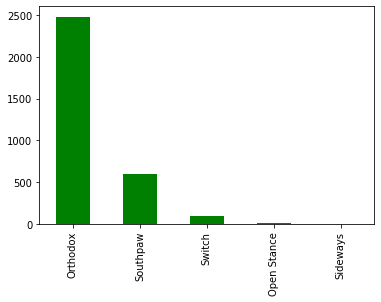

In [0]:
#analysing B-stance column.
dff['B_Stance'].value_counts().plot(kind='bar', color='green')

The orthodox stance is mostly used. this could imply that most of the players are right handed

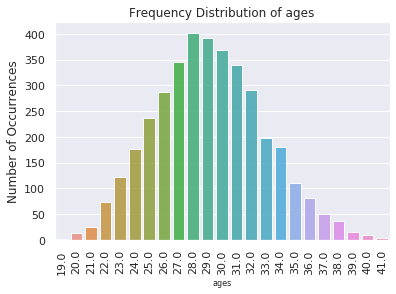

In [0]:
# Combinng ages of all fighters to get the distribution.
ages=df1['R_age'].append(df1['B_age'])
ages

#plot a barplot of the frequency distribution of a categorical feature using the seaborn package, 
#which shows the frequency distribution of the 'rfighter' column
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
rage_count = ages.value_counts()
sns.set(style="darkgrid")
sns.barplot(rage_count.index,rage_count.values, alpha=0.9)
plt.title('Frequency Distribution of ages')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ages', fontsize=8)
plt.xticks(rotation=90)
plt.show()

The ages of the ufc players follow a normal distribution. The highest number af players are aged 28

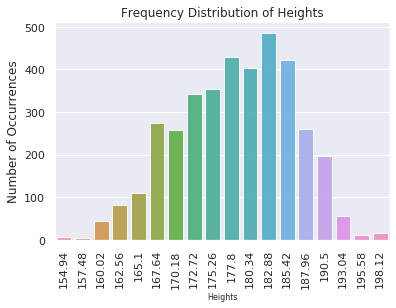

In [0]:
# Combinng weights of all fighters to get the distribution.
Heights=df1['B_Height_cms'].append(df1['R_Height_cms'])
Heights

#plot of frequencny distribution of the weights.
Height_count=Heights.value_counts()
sns.set(style='darkgrid')
sns.barplot(Height_count.index, Height_count.values, alpha=0.9)
plt.title('Frequency Distribution of Heights')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Heights', fontsize=8)
plt.xticks(rotation=90)
plt.show()

Heights of all the players are not normally distributed. Most of the players have a height of 170 cms


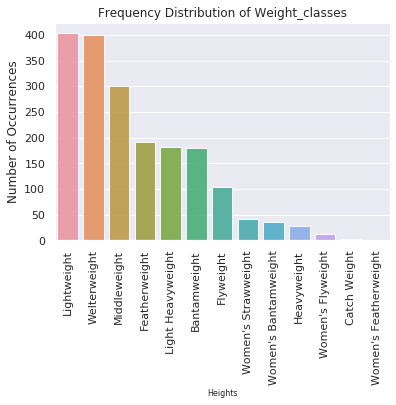

In [0]:
#plot of frequencny distribution of the weights.
weight_class_count=df1['weight_class'].value_counts()
sns.set(style='darkgrid')
sns.barplot(weight_class_count.index, weight_class_count.values, alpha=0.9)
plt.title('Frequency Distribution of Weight_classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Heights', fontsize=8)
plt.xticks(rotation=90)
plt.show()


The data set contains most fights in the light_weight weight class.


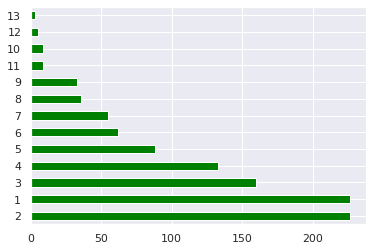

In [0]:
#frequency of the players.
fighters= df1['B_fighter'].append(df1['R_fighter'])
a=fighters.value_counts()
a.value_counts().plot.barh(color='green')


most players in the dataset have played 1 or 2 matches

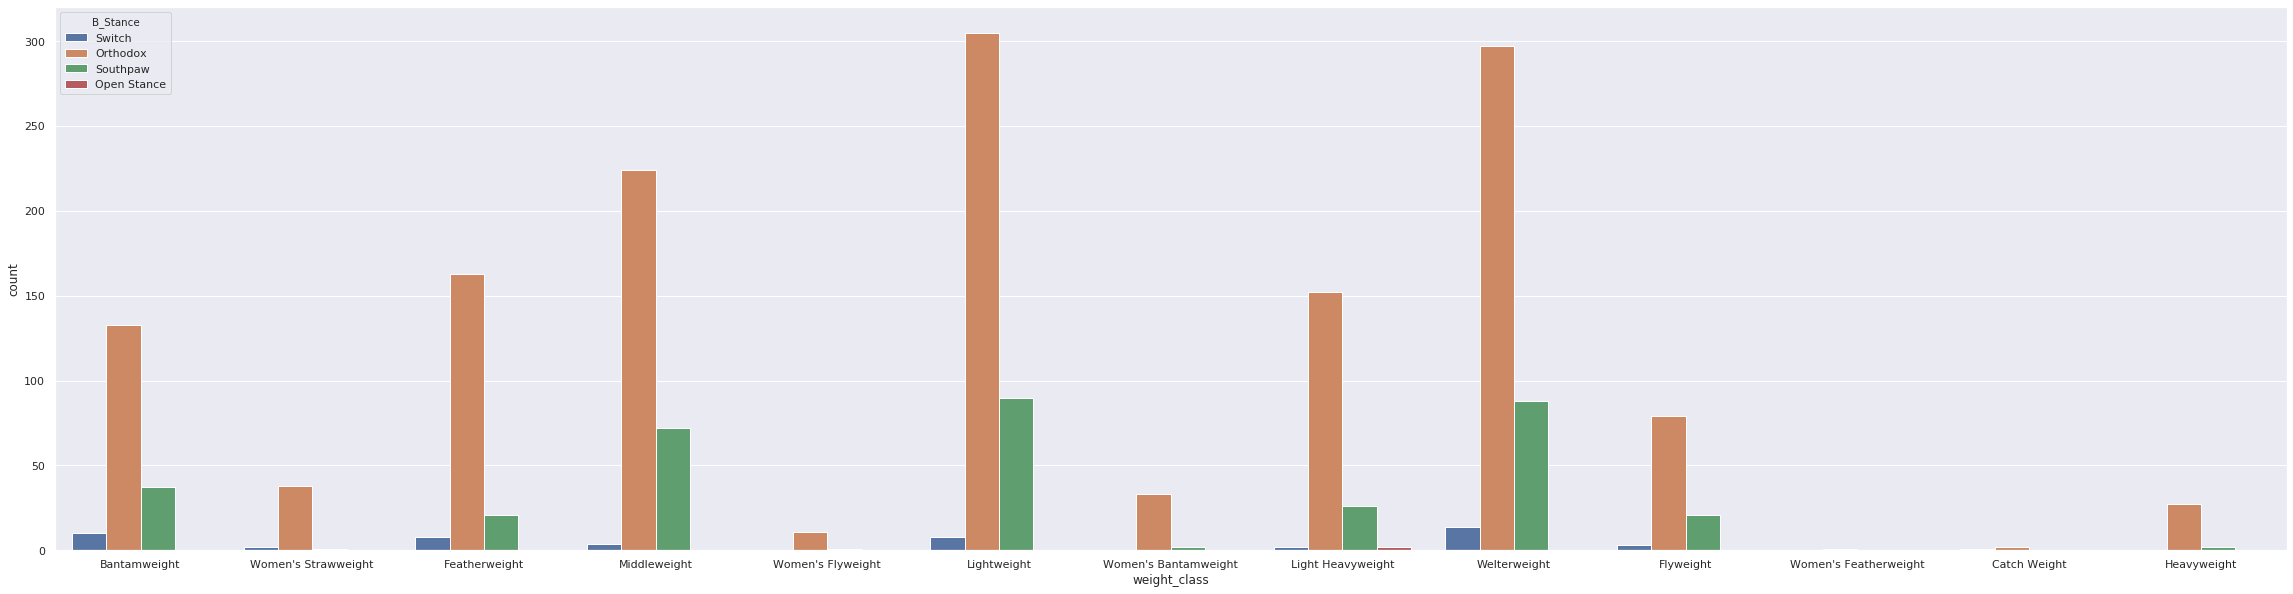

In [0]:
# Distribution of the 
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(40, 10))
ax = sns.countplot(x=df1['weight_class'], hue=df1['B_Stance'], data=df1,orient="h", alpha=1)

# BIVARIATE ANALYSIS

The stations have the highest number of charging slots.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 576x576 with 0 Axes>

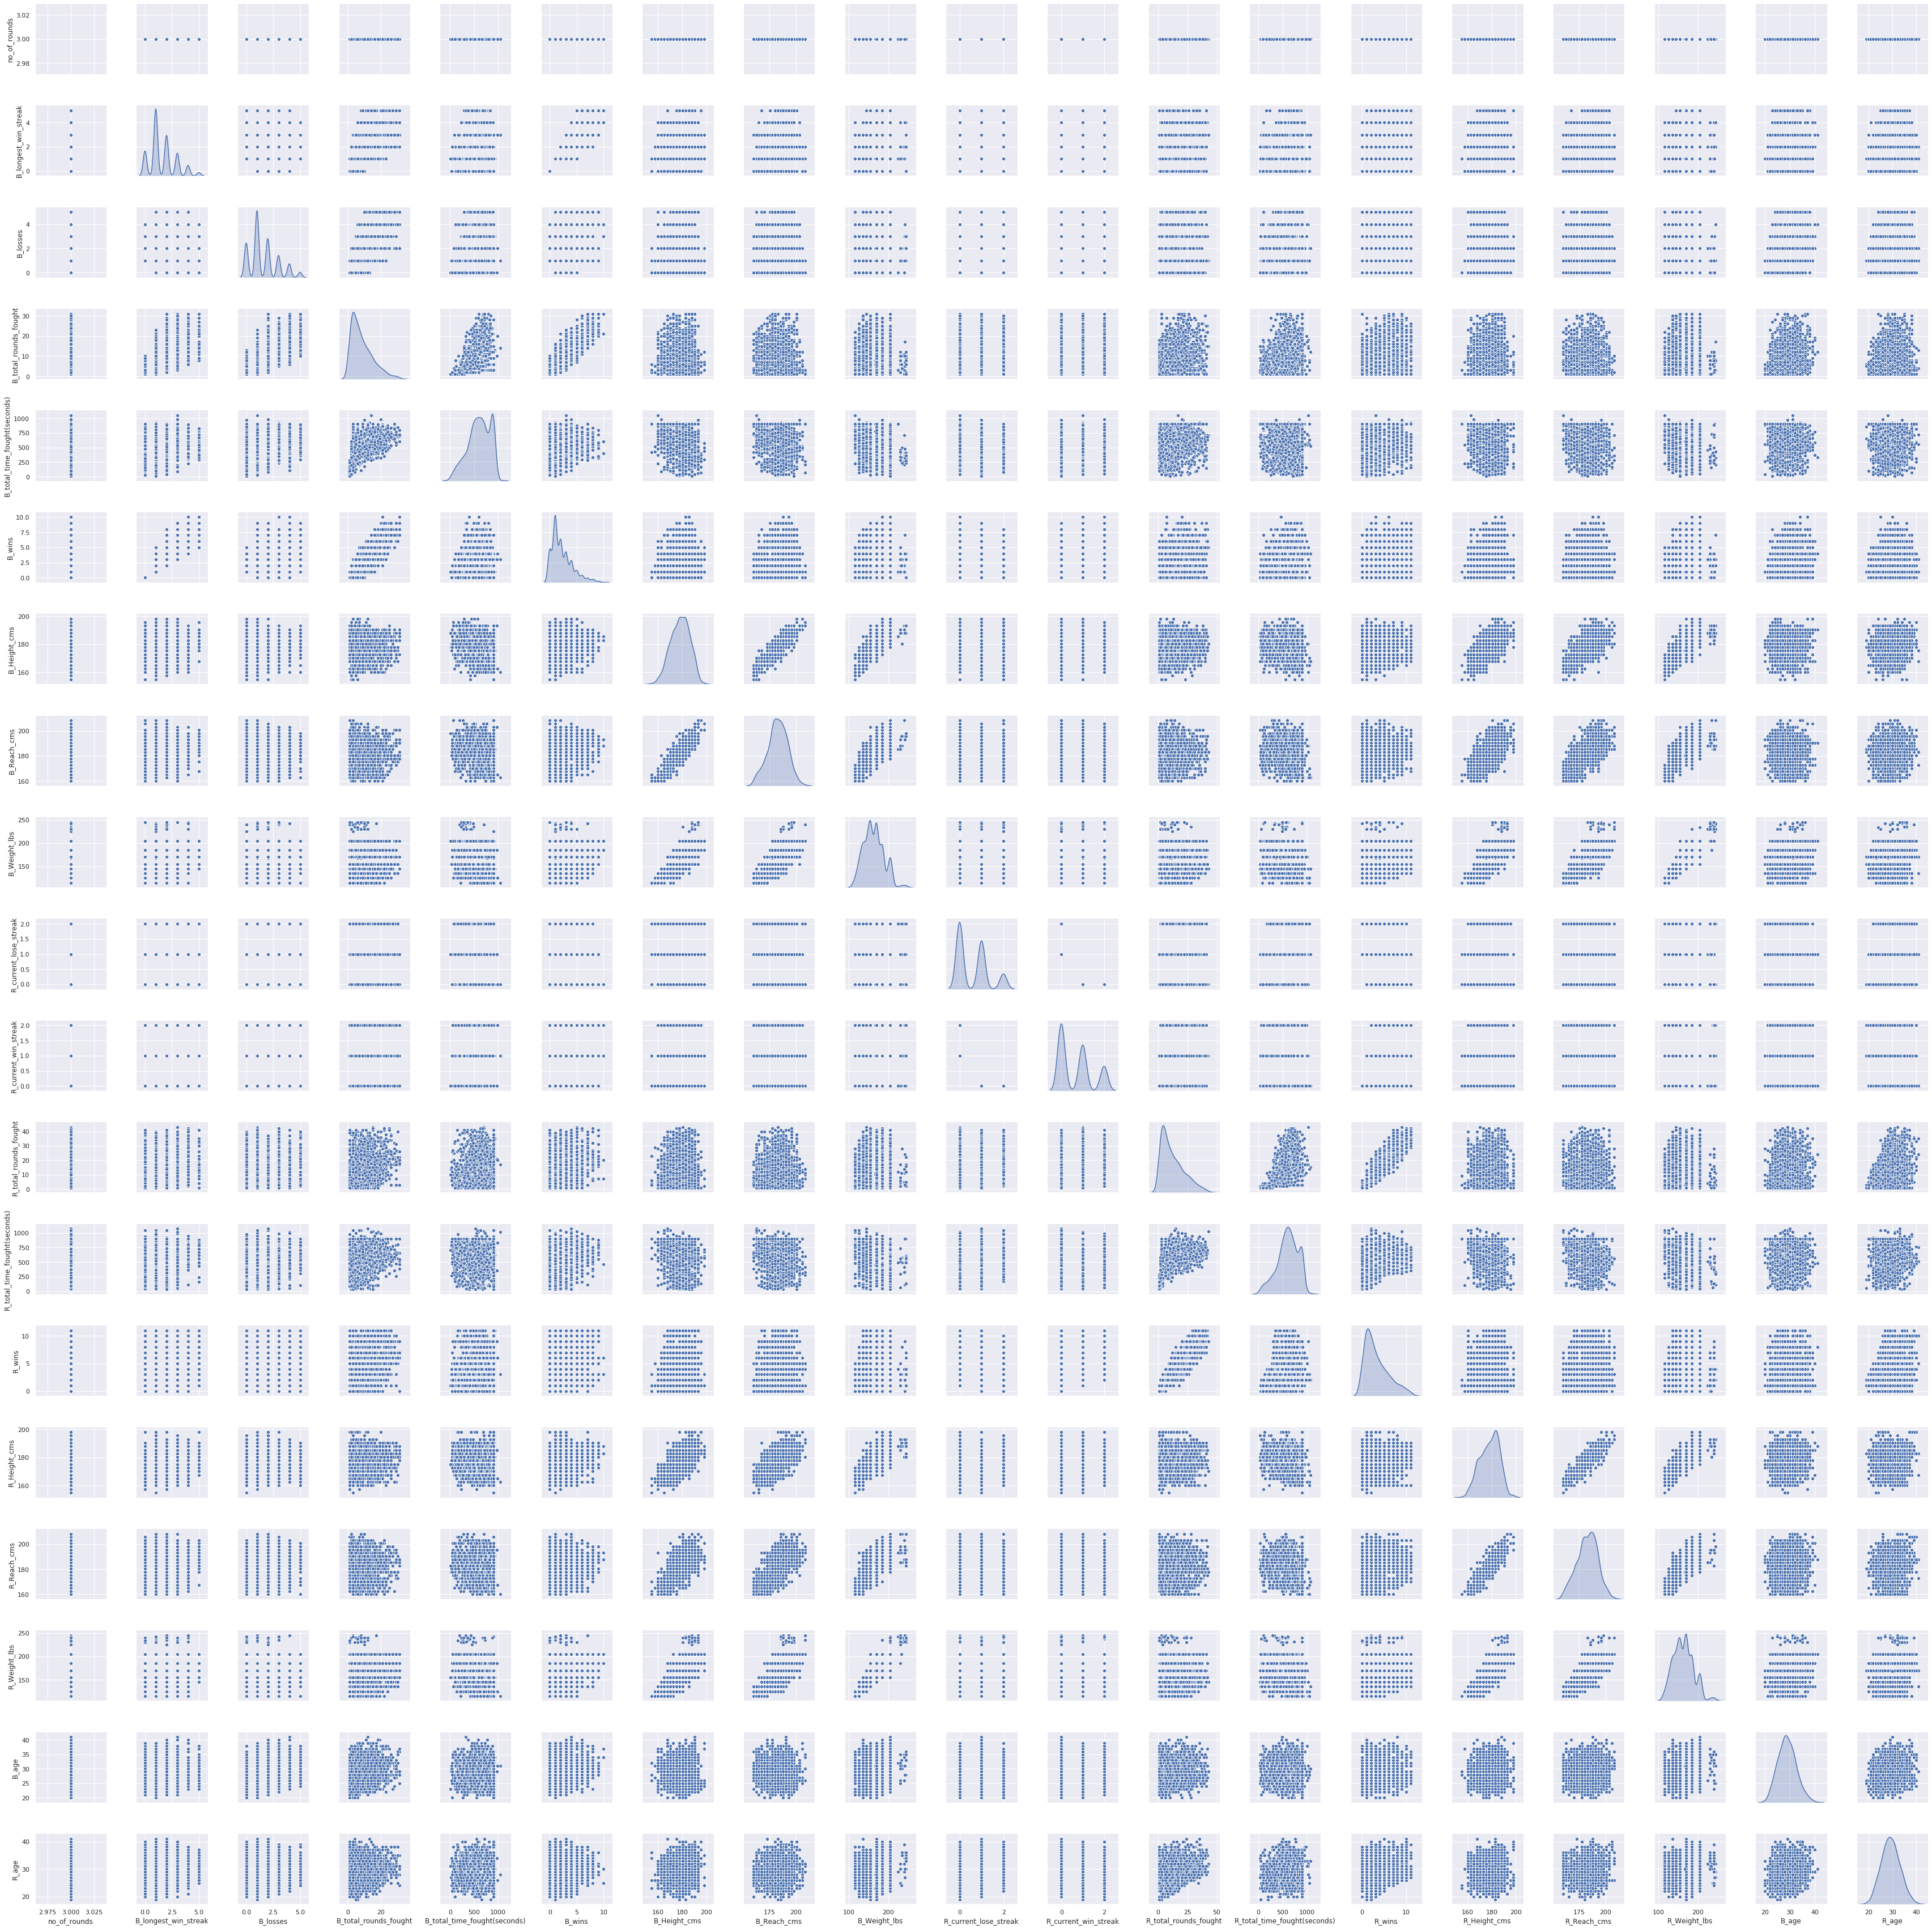

In [0]:
plt.figure(figsize=(8, 8))

sns.pairplot(df1, diag_kind='kde');

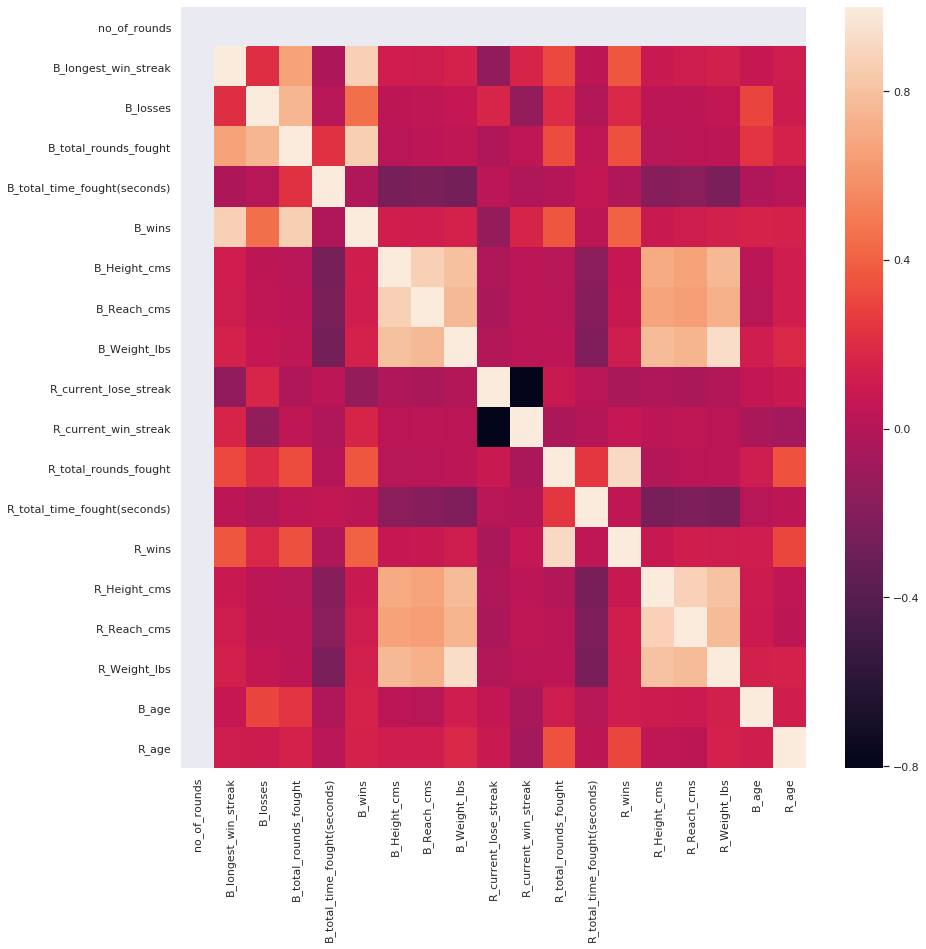

In [0]:
#the correlation network of all the variables selected
f,ax = plt.subplots(figsize=(14, 14))
corr = df1.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# MULTIVARIATE ANALYSIS

In [0]:
#Separating features and labels
X = df1.drop(['R_fighter',	'B_fighter',	'Referee', 'B_Stance'	,'location',	'Winner',	'weight_class',	'no_of_rounds',	'R_current_lose_streak',	'R_Stance'], 1)
y = df1['Winner']



In [0]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(      B_longest_win_streak  B_losses  ...  B_age  R_age
 254                      3         3  ...   32.0   29.0
 1773                     2         1  ...   25.0   32.0
 1807                     2         3  ...   39.0   33.0
 3421                     3         2  ...   31.0   34.0
 3424                     1         3  ...   30.0   33.0
 ...                    ...       ...  ...    ...    ...
 2107                     2         5  ...   34.0   36.0
 3056                     2         1  ...   29.0   26.0
 4069                     1         1  ...   28.0   33.0
 1466                     0         1  ...   29.0   34.0
 1788                     1         4  ...   27.0   36.0
 
 [1504 rows x 17 columns],
       B_longest_win_streak  B_losses  ...  B_age  R_age
 1328                     1         2  ...   33.0   29.0
 352                      3         4  ...   33.0   25.0
 611                      4         3  ...   31.0   33.0
 3555                     2         2  ...   35.0   40.0
 2

In [0]:
#Normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Appying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30363198, 0.20462912, 0.0950206 , 0.07668559, 0.05759748,
       0.05409193, 0.05122619, 0.04586695, 0.03838783, 0.02746389,
       0.0169644 , 0.00774005, 0.0065811 , 0.00588626, 0.00374327,
       0.00298073, 0.00150263])

In [0]:
#Using two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
#Training
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#predicting
y_pred = classifier.predict(X_test)


In [0]:
#Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[  2   0 148]
 [  0   0   7]
 [  1   0 218]]
Accuracy 0.5851063829787234


# SAMPLING

In [0]:
# subset data into lightweight.
df2=df1[df1['weight_class']=='Lightweight']
df2.head()

#peforming simple random analysis.
import numpy as np
np.random.seed(24)
df3 = df2.sample(n = 1000, replace="False")
df3.head()


 

,R_fighter,B_fighter,Referee,location,Winner,weight_class,no_of_rounds,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_time_fought(seconds),B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_total_rounds_fought,R_total_time_fought(seconds),R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4354,Tyson Griffin,Thiago Tavares,Steve Mazzagatti,"Anaheim, California, USA",Red,Lightweight,3,2,0,5,684.500000,2,Orthodox,170.18,172.72,145.0,0,1,7,636.666667,2,Orthodox,167.64,172.72,145.0,22.0,23.0
2565,Cristiano Marcello,Joe Proctor,Osiris de Medeiros,"Jaragua do Sul, Santa Catarina, Brazil",Blue,Lightweight,3,1,1,4,509.500000,1,Orthodox,177.80,182.88,155.0,1,0,8,757.666667,1,Orthodox,175.26,182.88,155.0,28.0,36.0
4040,Sam Stout,Matt Wiman,Dan Miragliotta,"Montreal, Quebec, Canada",Red,Lightweight,3,4,2,12,487.500000,4,Orthodox,177.80,172.72,155.0,2,0,16,767.666667,2,Orthodox,175.26,177.80,155.0,25.0,24.0
4835,Caol Uno,Yves Edwards,Larry Landless,"Bossier City, Louisiana, USA",Red,Lightweight,3,0,1,3,900.000000,0,Southpaw,175.26,185.42,155.0,1,0,7,539.666667,1,Southpaw,170.18,177.80,155.0,25.0,27.0
2070,Joe Lauzon,Al Iaquinta,Marc Goddard,"Las Vegas, Nevada, USA",Blue,Lightweight,3,3,2,17,624.142857,5,Orthodox,177.80,177.80,155.0,0,2,33,450.823529,11,Orthodox,177.80,180.34,155.0,27.0,30.0


# HYPOTHESIS TESTING

 ## **Hypothesis Statement Formulation**

**Null hypothesis.**

**Ho**: The average Body Mass index of UFC lightweight players is 25.1 .

Ho: U1 = 25.1.

**Alternative hypothesis.**

**H1**: The average Body Mass index of UFC lightweight players is not 25.1.

Ho: U1 != 25.1.

**selecting data to work with**

In [0]:
#Creating Bmi columns for R-fighter and B-fighters
df3['R_BMI']= (df3['R_Weight_lbs']/2.20462)/(df3['R_Height_cms']/100)**2
df3['B_BMI']= (df3['B_Weight_lbs']/2.20462)/(df3['B_Height_cms']/100)**2
df3.head()

#Combining BMI's for both R-fighters and B-fighters.
w=df3['R_BMI'].append(df3['B_BMI'])
print(w.shape)
#Performing simple random sampling to choose 1000 fighters.
final_bmi=w.sample(n = 1000, replace="False")

print(final_bmi.head())

# To confirm number of rows after sampling
print(final_bmi.shape)

(2000,)
1958    23.709972
2108    21.617916
355     22.889291
1177    23.567456
3626    22.239983
dtype: float64
(1000,)


## **Hypothesis Testing Computation**

*checking assumptions*

The population variance is unknown and sample picked is more than 30. We also check for assumption of normality.If all is satified the Z-test can be used.

(array([  1.,  23.,  29., 164., 242., 414.,  85.,  21.,  10.,  11.]),
 array([17.81094129, 18.77369405, 19.73644682, 20.69919958, 21.66195235,
        22.62470511, 23.58745788, 24.55021064, 25.51296341, 26.47571617,
        27.43846893]),
 <a list of 10 Patch objects>)

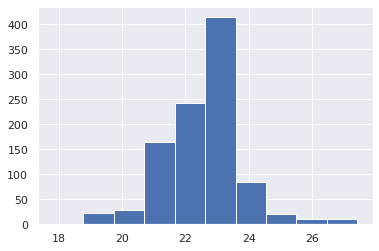

In [0]:
#Plotting histogram to check for normality.
import matplotlib.pyplot as plt
plt.hist(final_bmi, bins=10)


According to the plot above, assumption of normality has been satified

## **Setting a level of significance.**



Significance level chosen in this research is 0.05. Research allows a 5% error This means there is a 5% risk that we will be rejecting null when its true.

## **Computing the Z-test statistic**

In [0]:
# calculate means
from statistics import mean
mean = mean(final_bmi)
print(mean)

22.650559944602136


In [0]:
# calculate sample standard deviations
import numpy as np
from statistics import stdev
std = np.std(final_bmi) 
print(std)

1.2680896552356846


In [0]:
# calculate standard errors
import math
n = len(final_bmi)
std_error= std/math.sqrt(n)
print(std_error)

0.040100515878424274


In [0]:
# calculate the z statistic
z_stat = (mean - 25.1) / std_error
z_stat

-61.08250733791095

## **Calculating the P-Value**

In [0]:
# compare samples
# We calculate the P-value.

from scipy import stats
from scipy.stats import norm
prob =float(stats.norm.cdf(z_stat))
prob

0.0

In [0]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(final_bmi, x2=None, value=25.1)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


## **Hypothesis testing interpretation**


The null hypothesis is rejected when: 

P-Value < alpha.

In this research the P-Value is less than the alpha level i.e. 0.0 < 0.05.
In this case we reject the null hypothesis and conclude that:

The average Body Mass index of UFC lightweight players is not 25.1.